In [201]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] =42
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns

In [202]:
df_rel = pd.read_csv("RelationshipsFromSurveys.csv")
df_rel.head()

,id.A,id.B,relationship,survey.date
0,47,2,CloseFriend,2008-09-09
1,2,2,CloseFriend,2008-09-09
2,57,2,CloseFriend,2008-09-09
3,73,2,SocializeTwicePerWeek,2008-09-09
4,55,2,SocializeTwicePerWeek,2008-09-09


In [203]:
df_rel['relationship'].value_counts()

FacebookAllTaggedPhotos    9822
BlogLivejournalTwitter     9388
SocializeTwicePerWeek      5698
PoliticalDiscussant        4433
CloseFriend                2577
Name: relationship, dtype: int64

In [204]:
df_close = df_rel.loc[df_rel['relationship'] == 'CloseFriend']
df_close.shape

(2577, 4)

In [205]:
df_close.head(3)

,id.A,id.B,relationship,survey.date
0,47,2,CloseFriend,2008-09-09
1,2,2,CloseFriend,2008-09-09
2,57,2,CloseFriend,2008-09-09


In [206]:
df_social = df_rel.loc[df_rel['relationship'] == 'SocializeTwicePerWeek']
df_social.shape

(5698, 4)

In [207]:
df_social.head(3)

,id.A,id.B,relationship,survey.date
3,73,2,SocializeTwicePerWeek,2008-09-09
4,55,2,SocializeTwicePerWeek,2008-09-09
5,47,2,SocializeTwicePerWeek,2008-09-09


In [208]:
df_social_single = pd.DataFrame(df_social.groupby('id.B')['relationship'].value_counts())
df_social_single.head(3)

,,relationship
id.B,relationship,
1,SocializeTwicePerWeek,21
2,SocializeTwicePerWeek,80
3,SocializeTwicePerWeek,12


In [209]:
df_close_single = pd.DataFrame(df_close.groupby('id.B')['relationship'].value_counts())
df_close_single.head(3)

,,relationship
id.B,relationship,
1,CloseFriend,14
2,CloseFriend,34
3,CloseFriend,5


In [210]:
df_facebook = df_rel.loc[df_rel['relationship'] == 'FacebookAllTaggedPhotos']
df_facebook.shape

(9822, 4)

In [211]:
df_facebook.head(3)

,id.A,id.B,relationship,survey.date
33,55,2,FacebookAllTaggedPhotos,2008-09-09
34,39,2,FacebookAllTaggedPhotos,2008-09-09
35,37,2,FacebookAllTaggedPhotos,2008-09-09


In [212]:
df_facebook_single = pd.DataFrame(df_facebook.groupby('id.B')['relationship'].value_counts())
df_facebook_single.head(3)

,,relationship
id.B,relationship,
1,FacebookAllTaggedPhotos,97
2,FacebookAllTaggedPhotos,116
3,FacebookAllTaggedPhotos,98


In [213]:
df_close_single.to_csv('close_test.csv')

In [214]:
df_social_single.to_csv('social_test.csv')

In [215]:
df_facebook_single.to_csv('facebook_test.csv')

In [216]:
df_stress = pd.read_csv("FluSymptoms.csv")
df_stress.head(3)

,user_id,time,sore.throat.cough,runnynose.congestion.sneezing,fever,nausea.vomiting.diarrhea,sad.depressed,open.stressed
0,2,2009-01-09 19:38:00,0,0,0,0,1,1
1,2,2009-01-10 13:36:00,0,0,0,0,1,1
2,2,2009-01-11 12:58:00,0,0,0,0,0,0


In [217]:
df_stress.groupby('user_id')['open.stressed'].value_counts().head()

user_id  open.stressed
2        0                 81
         1                 17
4        0                126
         1                  2
5        0                 52
Name: open.stressed, dtype: int64

In [218]:
df_stress1 = df_stress.loc[df_stress['open.stressed'] == 1]
df_stress1.head()

,user_id,time,sore.throat.cough,runnynose.congestion.sneezing,fever,nausea.vomiting.diarrhea,sad.depressed,open.stressed
0,2,2009-01-09 19:38:00,0,0,0,0,1,1
1,2,2009-01-10 13:36:00,0,0,0,0,1,1
12,2,2009-01-21 15:16:00,0,0,0,1,1,1
16,2,2009-01-24 12:32:00,0,0,0,1,1,1
28,2,2009-02-04 09:23:00,1,1,0,0,1,1


In [219]:
df_stress1.reset_index(inplace=True)
df_stress1.head()

,index,user_id,time,sore.throat.cough,runnynose.congestion.sneezing,fever,nausea.vomiting.diarrhea,sad.depressed,open.stressed
0,0,2,2009-01-09 19:38:00,0,0,0,0,1,1
1,1,2,2009-01-10 13:36:00,0,0,0,0,1,1
2,12,2,2009-01-21 15:16:00,0,0,0,1,1,1
3,16,2,2009-01-24 12:32:00,0,0,0,1,1,1
4,28,2,2009-02-04 09:23:00,1,1,0,0,1,1


In [220]:
df_stress_single = pd.DataFrame(df_stress1.groupby('user_id')['open.stressed'].value_counts())
df_stress_single.head(3)

,,open.stressed
user_id,open.stressed,
2,1,17
4,1,2
5,1,2


In [221]:
df_stress_single.to_csv('stress_test.csv')

In [222]:
df_stress_single = pd.read_csv("stress_test.csv")
df_stress_single.head()

,user_id,open.stressed,open.stressed.1
0,2,1,17
1,4,1,2
2,5,1,2
3,6,1,17
4,7,1,2


In [223]:
df_close_single = pd.read_csv('close_test.csv')
df_close_single.head()

,id.B,relationship,relationship.1
0,1,CloseFriend,14
1,2,CloseFriend,34
2,3,CloseFriend,5
3,4,CloseFriend,44
4,5,CloseFriend,15


In [224]:
df_facebook_single = pd.read_csv('facebook_test.csv')
df_facebook_single.head(3)

,id.B,relationship,relationship.1
0,1,FacebookAllTaggedPhotos,97
1,2,FacebookAllTaggedPhotos,116
2,3,FacebookAllTaggedPhotos,98


In [225]:
df_fb = df_facebook_single.merge(df_stress_single, left_on='id.B', right_on='user_id')
df_fb.head()

,id.B,relationship,relationship.1,user_id,open.stressed,open.stressed.1
0,2,FacebookAllTaggedPhotos,116,2,1,17
1,4,FacebookAllTaggedPhotos,130,4,1,2
2,5,FacebookAllTaggedPhotos,110,5,1,2
3,6,FacebookAllTaggedPhotos,149,6,1,17
4,7,FacebookAllTaggedPhotos,112,7,1,2


In [228]:
df_friends = df_close_single.merge(df_stress_single, left_on='id.B', right_on='user_id')
df_friends.head()

,id.B,relationship,relationship.1,user_id,open.stressed,open.stressed.1
0,2,CloseFriend,34,2,1,17
1,4,CloseFriend,44,4,1,2
2,5,CloseFriend,15,5,1,2
3,6,CloseFriend,51,6,1,17
4,7,CloseFriend,17,7,1,2


In [229]:
df_social_single = pd.read_csv('social_test.csv')
df_social_single.head(3)

,id.B,relationship,relationship.1
0,1,SocializeTwicePerWeek,21
1,2,SocializeTwicePerWeek,80
2,3,SocializeTwicePerWeek,12


In [232]:
df_acqua = df_social_single.merge(df_stress_single, left_on='id.B', right_on='user_id')
df_acqua.head()

,id.B,relationship,relationship.1,user_id,open.stressed,open.stressed.1
0,2,SocializeTwicePerWeek,80,2,1,17
1,4,SocializeTwicePerWeek,67,4,1,2
2,5,SocializeTwicePerWeek,80,5,1,2
3,6,SocializeTwicePerWeek,140,6,1,17
4,7,SocializeTwicePerWeek,43,7,1,2


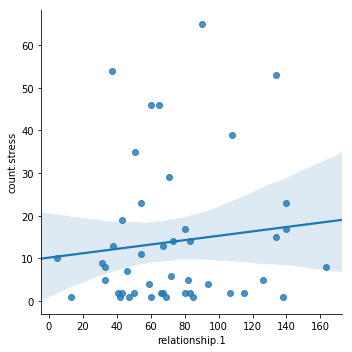

In [231]:
sns.lmplot(x="relationship.1", y='count.stress', data=df_acqua)

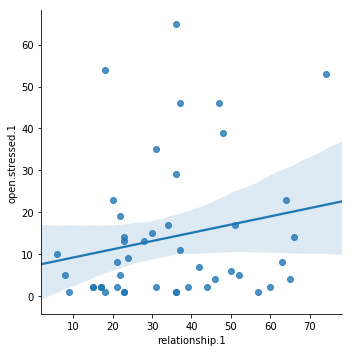

In [238]:
sns.lmplot(x="relationship.1", y='open.stressed.1', data=df_friends)

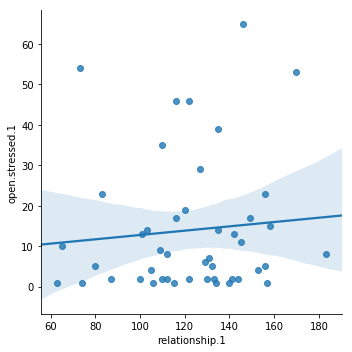

In [239]:
sns.lmplot(x="relationship.1", y='open.stressed.1', data=df_fb)